# day2: Neural Network in Pytorch
赵晓冬 2019.8.10

In [1]:
import torch
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [2]:
x = torch.linspace(-1, 1, 100)
y = x.pow(2) + 0.2 * torch.rand(x.size())

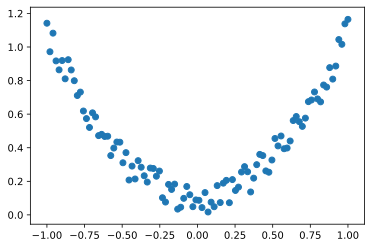

In [3]:
plt.scatter(x.data.numpy(), y.data.numpy())

In [4]:
import torch.nn as nn

In [5]:
class Net(nn.Module):
    def __init__(self, dim_input, dim_hidden, dim_output):
        super(Net, self).__init__()
        
        self.N = nn.Sequential(
            nn.Linear(dim_input, dim_hidden),
            nn.ReLU(),
            nn.Linear(dim_hidden, dim_output)
        )
    
    def forward(self, x):
        out = self.N(x)
        return out

In [6]:
net = Net(dim_input=1, dim_hidden=10, dim_output=1)
print(net)

Net(
  (N): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [7]:
x = x.view(-1, 1)
y = y.view(-1, 1)
print(x.shape)

torch.Size([100, 1])


In [8]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
criterion = nn.MSELoss()

In [9]:
for epoch in range(100):
    out = net(x)
    loss = criterion(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [10]:
plt.ion()

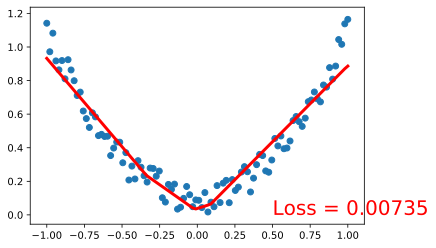

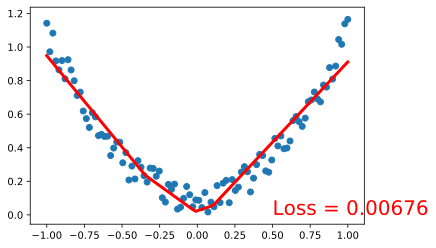

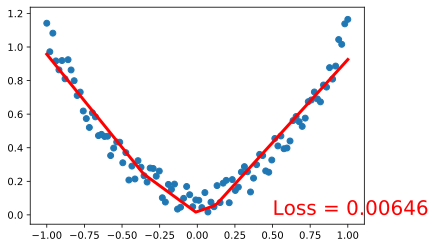

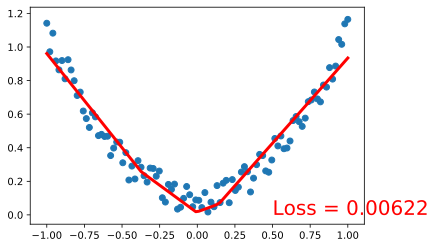

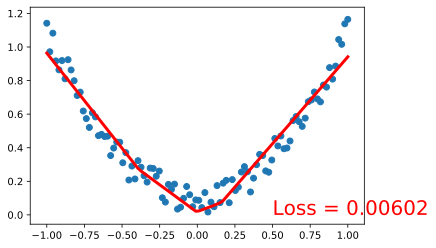

In [11]:
for epoch in range(100):
    out = net(x)
    loss = criterion(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 20 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), out.data.numpy(), 'r-', lw=3)
        plt.text(0.5,0,'Loss = %.5f'%loss.data.numpy(),fontdict={'size':20,'color':'red'}) 
        plt.pause(0.2)

## 练习

In [12]:
x = torch.linspace(-1, 1, 20)
y = torch.linspace(-1, 1, 20)
z = torch.sin(x * y)

In [13]:
from mpl_toolkits.mplot3d import Axes3D

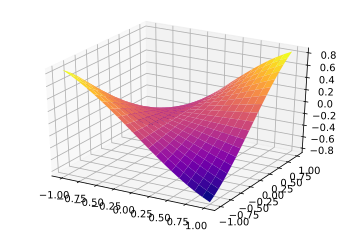

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x_grid, y_grid = torch.meshgrid(x, y)
z_grid = torch.sin(x_grid * y_grid)
ax.plot_surface(x_grid.data.numpy(), y_grid.data.numpy(), z_grid.data.numpy(), cmap='plasma')
plt.show()

In [37]:
class Net2(nn.Module):
    def __init__(self, dim_input, dim_hidden1, dim_hidden2, dim_hidden3, dim_output):
        super(Net2, self).__init__()
        
        self.N = nn.Sequential(
            nn.Linear(dim_input, dim_hidden1),
            nn.ReLU(),
            nn.Linear(dim_hidden1, dim_hidden2),
            nn.ReLU(),
            nn.Linear(dim_hidden2, dim_hidden3),
            nn.ReLU(),
            nn.Linear(dim_hidden3, dim_output)
        )
    
    def forward(self, x):
        out = self.N(x)
        return out

In [54]:
net2 = Net2(dim_input=2, dim_hidden1=10, dim_hidden2=10, dim_hidden3=10, dim_output=1)
print(net2)

Net2(
  (N): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [55]:
optimizer = torch.optim.SGD(net2.parameters(), lr=0.2)
criterion = nn.MSELoss()

In [56]:
input_x = x_grid.contiguous().view(-1, 1)
input_y = y_grid.contiguous().view(-1, 1)

In [57]:
z_output = z_grid.contiguous().view(-1, 1)
print(z_output.shape)

torch.Size([400, 1])


In [58]:
input_val = torch.cat([input_x, input_y], dim = 1)
print(input_val.shape)

torch.Size([400, 2])


In [59]:
plt.ion()

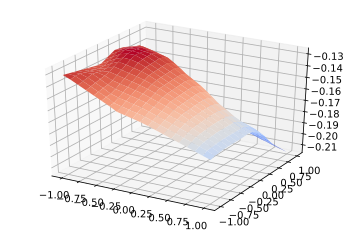

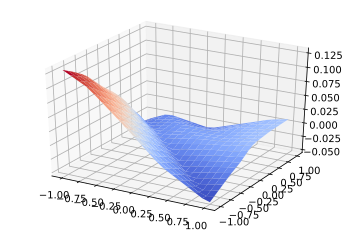

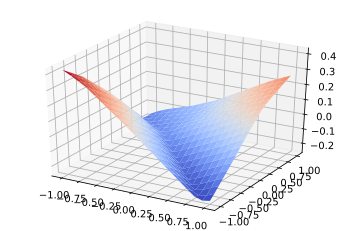

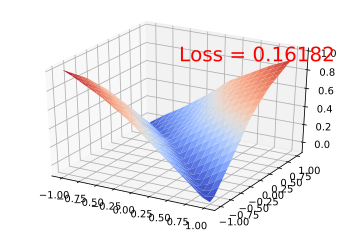

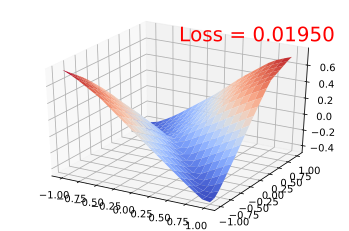

In [60]:
for epoch in range(200):
    out = net2(input_val)
    loss = criterion(out, z_output)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 40 == 0:
        output_grid = out.view(20, 20)
        ax = plt.figure().gca(projection='3d')
        ax.plot_surface(x_grid.data.numpy(), y_grid.data.numpy(), output_grid.data.numpy(), cmap='coolwarm')
#         ax.plot_surface(x_grid.data.numpy(), y_grid.data.numpy(), z_grid.data.numpy(), cmap='plasma')
        ax.text(0.,0.,1,s='Loss = %.5f'%loss.data.numpy(),fontdict={'size':20,'color':'red'}) 
        plt.show()
        plt.pause(0.5)